In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Read csv File

In [11]:
df = pd.read_csv('Mall_Customers.csv')

# Access Head 5 rows

In [12]:
df.head()

,Unnamed: 0,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,1,1,19,15,39
1,1,2,1,21,15,81
2,2,3,0,20,16,6
3,3,4,0,23,16,77
4,4,5,0,31,17,40


# Details about dataset

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Unnamed: 0              200 non-null    int64
 1   CustomerID              200 non-null    int64
 2   Gender                  200 non-null    int64
 3   Age                     200 non-null    int64
 4   Annual Income (k$)      200 non-null    int64
 5   Spending Score (1-100)  200 non-null    int64
dtypes: int64(6)
memory usage: 9.5 KB


# Mathematical Operations Appling

In [14]:
df.describe()

,Unnamed: 0,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,99.500000,100.500000,0.440000,38.850000,60.560000,50.200000
std,57.879185,57.879185,0.497633,13.969007,26.264721,25.823522
min,0.000000,1.000000,0.000000,18.000000,15.000000,1.000000
25%,49.750000,50.750000,0.000000,28.750000,41.500000,34.750000
50%,99.500000,100.500000,0.000000,36.000000,61.500000,50.000000
75%,149.250000,150.250000,1.000000,49.000000,78.000000,73.000000
max,199.000000,200.000000,1.000000,70.000000,137.000000,99.000000


# Clean the dataset by dropping the 'Unnamed: 0' column and converting 'Gender' column to labels

In [21]:
cleaned_data = df.drop(columns=['Unnamed: 0'])
cleaned_data['Gender'] = cleaned_data['Gender'].replace({1: 'Male', 0: 'Female'})

# Select relevant features for clustering

In [22]:
X = cleaned_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the features for better clustering results

In [24]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-means clustering with 5 clusters

In [25]:
kmeans = KMeans(n_clusters=5, random_state=42)
cleaned_data['Cluster'] = kmeans.fit_predict(X_scaled)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


# Visualize the clusters using a scatterplot

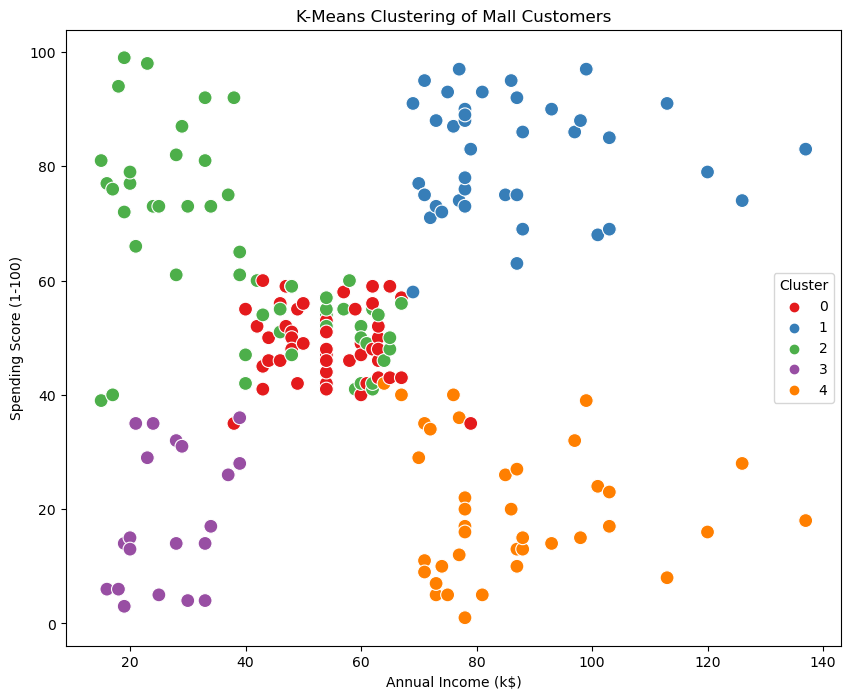

In [26]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=cleaned_data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set1', s=100)
plt.title('K-Means Clustering of Mall Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()